In [32]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [4]:
#res = pd.read_csv("../../Results/Ising_Frustrated/Classical/res_1000x1000_10err.gzip", compression='gzip')
res = pd.read_csv("../../Results/Ising_Frustrated/Classical/res_numba_100x100_100err.csv")

In [5]:
M_Dwave = np.loadtxt("../../Results/Ising_Frustrated/DWave/100_ratio_points.txt")
M_Dwave = M_Dwave.T

In [34]:
res = res[['T', 'ratio', 'M']]

Ts = res["T"].unique()
MAE = np.zeros(Ts.shape)
R2 = np.zeros(Ts.shape)
MSE = np.zeros(Ts.shape)

In [35]:
for i, T in enumerate(Ts):
    M_th = res.loc[res["T"] == T, 'M'].to_numpy()
    MAE[i] = mean_absolute_error(M_th, M_Dwave[:, 1])
    R2[i] = r2_score(M_th, M_Dwave[:, 1])
    MSE[i] = mean_squared_error(M_th, M_Dwave[:, 1], squared=False)

In [36]:
np.argmin(MAE), np.argmax(R2), np.argmin(MSE)

(31, 31, 31)

In [37]:
best_fit = np.argmin(MAE)
Ts[best_fit]

1.008080808080808

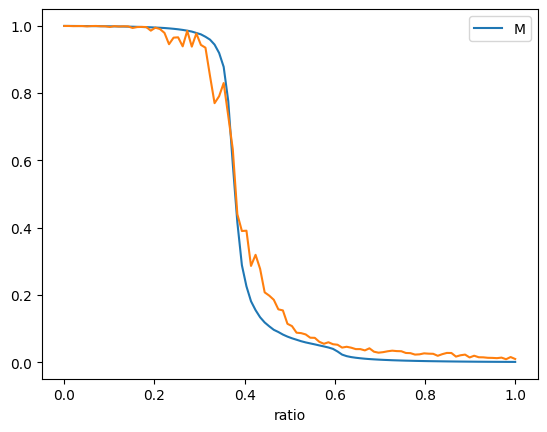

In [38]:
res.loc[res["T"] == Ts[best_fit]].plot("ratio", "M")
plt.plot(M_Dwave[:, 0], M_Dwave[:, 1])